**Timothy Ng - World Happiness Report: Advanced Machine Learning Projects**

**Introduction**

This is an analysis of the [World Happiness Report](https://worldhappiness.report/ed/2022/happiness-benevolence-and-trust-during-covid-19-and-beyond/#ranking-of-happiness-2019-2021) dataset. The report details the factors that go into the authors methodology of what makes a certain country happy. It includes varaibles such as GDP per capita, perceptions of corruption, and life expectancy among other things. The target variable is, of course, a measure of a happinness. The data has been somewhat altered for competition purposes and the target variable has been split into categories of: very low, low, average, high, and very high happpiness. 

In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [2]:
#import data
x_train = pd.read_csv("/Users/timothyng/Documents/world_happiness_competition_data/X_train.csv")
y_train = pd.read_csv("/Users/timothyng/Documents/world_happiness_competition_data/y_train.csv")
x_test = pd.read_csv("/Users/timothyng/Documents/world_happiness_competition_data/X_test.csv")

In [3]:
#look at x_train
x_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


As we can see from the dependent features, there are a mix of continous and categorical variables. Some features are also variations of others. For example, country or region and the more specific name and region. Sub-region is also, of course, a derivative of region. 

In [4]:
#look at y_train
y_train.head()

,Average,High,Low,Very High,Very Low
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


The target variable is also categorical and is one hot encoded. This lends itself to be used in a RFE.

**EDA**

In [5]:
#check the shape of the data
print("x:",x_train.shape)
print("y:",y_train.shape)

x: (88, 11)
y: (88, 5)


In [6]:
#check variables in training data 
print("x:",x_train.columns)
print("y:",y_train.columns)

x: Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'name', 'region', 'sub-region',
       'Terrorist_attacks'],
      dtype='object')
y: Index(['Average', 'High', 'Low', 'Very High', 'Very Low'], dtype='object')


In [7]:
#check for missing data 
print("Training Data X:",x_train.isnull().values.any())
print("Training Data Y:",y_train.isnull().values.any())
print("Test Data X:",x_test.isnull().values.any())

Training Data X: False
Training Data Y: False
Test Data X: False


In [8]:
#undummify y_train for visualisation purposes
y_undummy = y_train.idxmax(axis=1)

#combine dfs for visualisation purposes
df_visual = x_train.copy()
df_visual["Happiness"] = y_undummy

df_visual.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,Happiness
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000,Average
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111,High
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000,Average
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333,Very High
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111,High


<AxesSubplot:xlabel='Happiness', ylabel='Freedom to make life choices'>

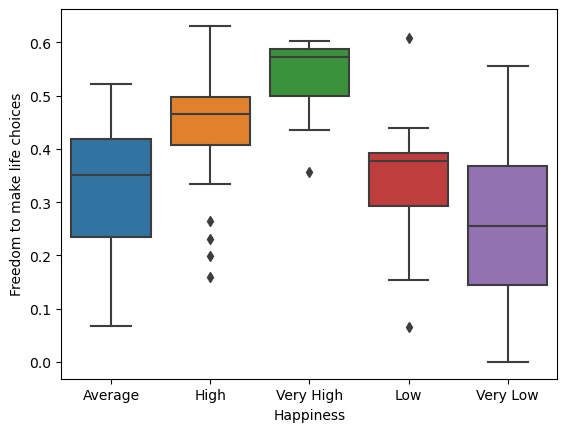

In [9]:

sns.boxplot(y = df_visual["Freedom to make life choices"], x = df_visual["Happiness"])

Unsurpsingly, the general trend is that the more freedom a country lends its citizens to make life choices, the happier its citizens are. But some countries with lower freedom also seem to be almost a happy as those with average freedom. There are also many outliers for those countries with high freedom. We might assume then, that freedom is an important but not the end-all be-all to happiness. The variability is also high for most of the box plots further supporting this assumption.

<AxesSubplot:xlabel='Happiness', ylabel='Social support'>

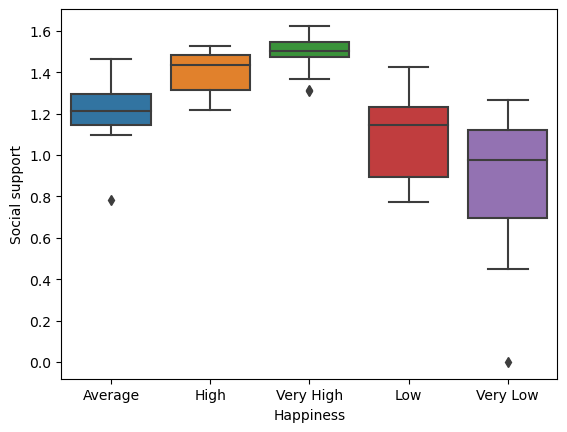

In [10]:
sns.boxplot(y = df_visual["Social support"], x = df_visual["Happiness"])

Social Support tends to exhibit less variation than freedom with respect to happiness. But again, the intuitive idea that more social support is correlated with higher happiness seems to be true, this time even moreso than happiness with fewer outliers as well. 

<AxesSubplot:xlabel='Happiness', ylabel='GDP per capita'>

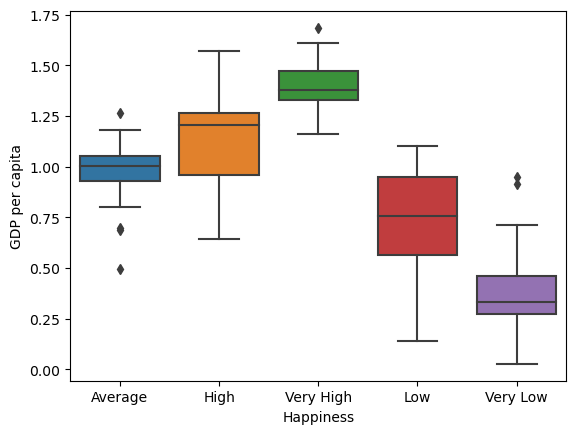

In [11]:
sns.boxplot(y = df_visual["GDP per capita"], x = df_visual["Happiness"])

<AxesSubplot:xlabel='Happiness', ylabel='Generosity'>

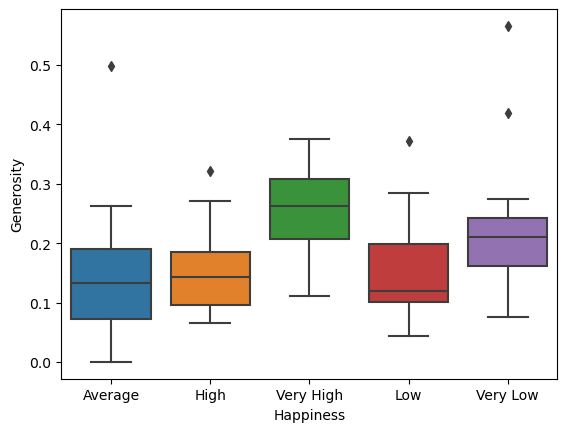

In [12]:
sns.boxplot(y = df_visual["Generosity"], x = df_visual["Happiness"])

<AxesSubplot:xlabel='Happiness', ylabel='Healthy life expectancy'>

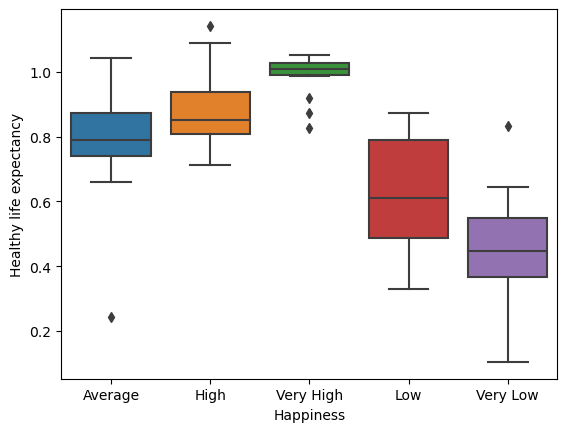

In [13]:
sns.boxplot(y = df_visual["Healthy life expectancy"], x = df_visual["Happiness"])

<AxesSubplot:xlabel='Happiness', ylabel='Perceptions of corruption'>

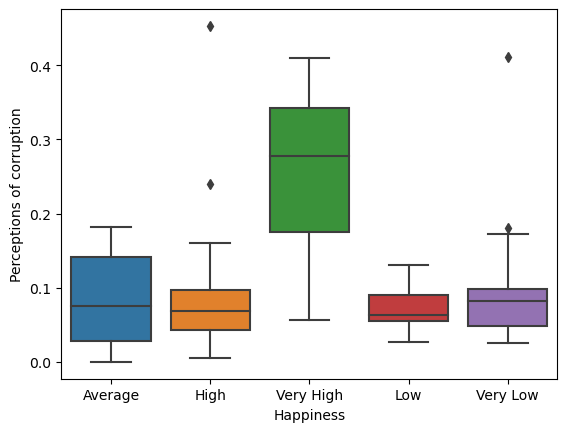

In [14]:
sns.boxplot(y = df_visual["Perceptions of corruption"], x = df_visual["Happiness"])

It seemes that the countries with very high happiness tend to suspect more corruption in their own region. A healthy amount of skepticism is common in many democratic nations with presumably high freedom so there is probably some correlation going on here.

<AxesSubplot:xlabel='Happiness', ylabel='Terrorist_attacks'>

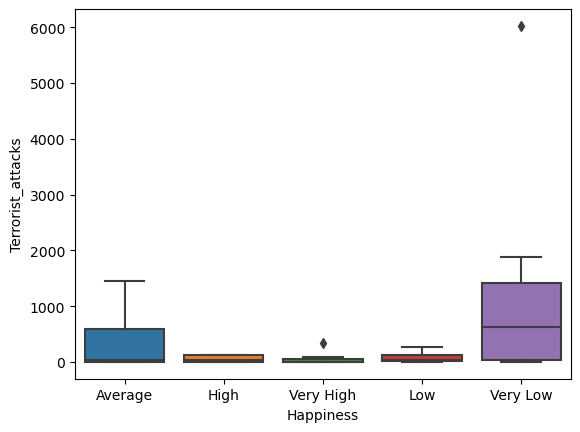

In [15]:
sns.boxplot(y = df_visual["Terrorist_attacks"], x = df_visual["Happiness"])

**Automatic Feature Selection**

Since the training data for the target variable is presented in one hot encoded format, I will use XGBoost, an RFE, to do some automatic feature selection.

In [16]:
#one hot encode some of the categorical variables for XGBoost
dum_df = pd.get_dummies(x_train, columns=["region","sub-region"])
dum_df.columns

Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'name', 'Terrorist_attacks',
       'region_Africa', 'region_Americas', 'region_Asia', 'region_Europe',
       'region_Oceania', 'sub-region_Australia and New Zealand',
       'sub-region_Central Asia', 'sub-region_Eastern Asia',
       'sub-region_Eastern Europe',
       'sub-region_Latin America and the Caribbean',
       'sub-region_Northern Africa', 'sub-region_Northern America',
       'sub-region_Northern Europe', 'sub-region_South-eastern Asia',
       'sub-region_Southern Asia', 'sub-region_Southern Europe',
       'sub-region_Sub-Saharan Africa', 'sub-region_Western Asia',
       'sub-region_Western Europe'],
      dtype='object')

In [17]:
#check whether they have been dummified correctly
dum_df.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,Terrorist_attacks,region_Africa,...,sub-region_Latin America and the Caribbean,sub-region_Northern Africa,sub-region_Northern America,sub-region_Northern Europe,sub-region_South-eastern Asia,sub-region_Southern Asia,sub-region_Southern Europe,sub-region_Sub-Saharan Africa,sub-region_Western Asia,sub-region_Western Europe
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,18.000000,0,...,1,0,0,0,0,0,0,0,0,0
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,125.611111,0,...,1,0,0,0,0,0,0,0,0,0
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,112.000000,0,...,0,0,0,0,0,0,1,0,0,0
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,57.333333,0,...,0,0,0,0,0,0,0,0,1,0
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,125.611111,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#drop these columns as they have zero variance since they are the names of the countries 
dum_df = dum_df.drop(columns=['Country or region','name'])
dum_df.columns

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Terrorist_attacks', 'region_Africa',
       'region_Americas', 'region_Asia', 'region_Europe', 'region_Oceania',
       'sub-region_Australia and New Zealand', 'sub-region_Central Asia',
       'sub-region_Eastern Asia', 'sub-region_Eastern Europe',
       'sub-region_Latin America and the Caribbean',
       'sub-region_Northern Africa', 'sub-region_Northern America',
       'sub-region_Northern Europe', 'sub-region_South-eastern Asia',
       'sub-region_Southern Asia', 'sub-region_Southern Europe',
       'sub-region_Sub-Saharan Africa', 'sub-region_Western Asia',
       'sub-region_Western Europe'],
      dtype='object')

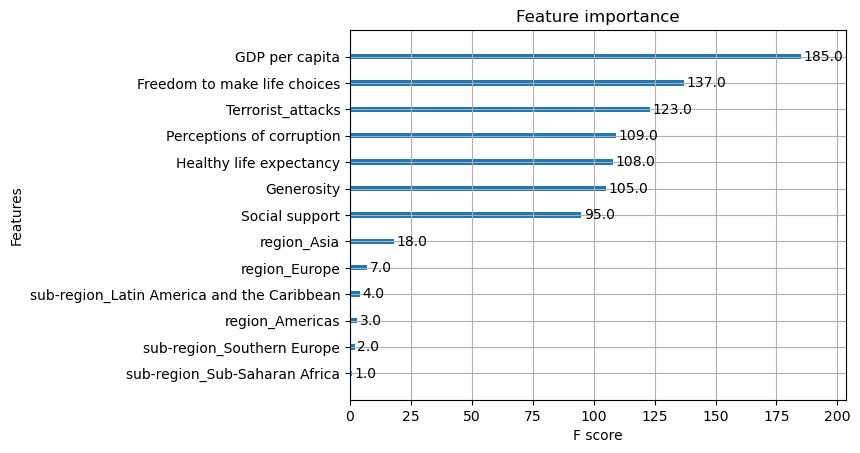

In [19]:
#run xgboost to get feature importance
model = XGBClassifier()
model.fit(dum_df, y_train)
plot_importance(model)
pyplot.show()

In [20]:
#feature selection using SelectFromModel
select = SelectFromModel(model, prefit=True)
feature_idx = select.get_support()
feature_name = dum_df.columns[feature_idx]
feature_name

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Generosity', 'Perceptions of corruption', 'Terrorist_attacks',
       'region_Americas', 'sub-region_Latin America and the Caribbean',
       'sub-region_Southern Europe', 'sub-region_Sub-Saharan Africa'],
      dtype='object')

XGBoost eliminated many features of the dummified categorical variables, most notably almost all of the region variables with the exception of region_Americas. We will neeed to test out various configurations of independent features to see if this is really the best fit for the model.

**Modeling**

Much of the modelling for this project was done in a seperate notebook on google collab for the purposes of submission to a modelling competeition on [modelshare.org](https://www.modelshare.org/). Here, I will share the code for what was my best model, a Random Forest Classifier. I tried various other approaches, including a Neural Net, Gradient Boosting, Logistic Regression, and Support Vector Machines. I found that the Random Forest, and Gradient Boosting worked best for this problem while my Logistic Regression model had the worst accuracy. Including only the features selected by the automatic feature selection from SelectFromModel also hindered performance. This may because there is not much data to use in the first place and also not that many features to choose from. Much of the hyper-parameter tuning was done using GridSearchCV.

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = x_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(x_train) 

#get labels for y_train
y_train_labels = y_train.idxmax(axis=1)

In [22]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [23]:
#Random Forest 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [False],
    'max_depth': [5, 10,20],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3],
    'min_samples_split': [4,5,7],
    'n_estimators': [100, 200, 300, 1000]}

gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)

#use meta model methods to fit score and predict model:
gridmodel.fit(preprocessor(x_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.705
best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
